In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
type(crimes['TIME OCC'][0])

str

## Which hour has the highest frequency of crimes?

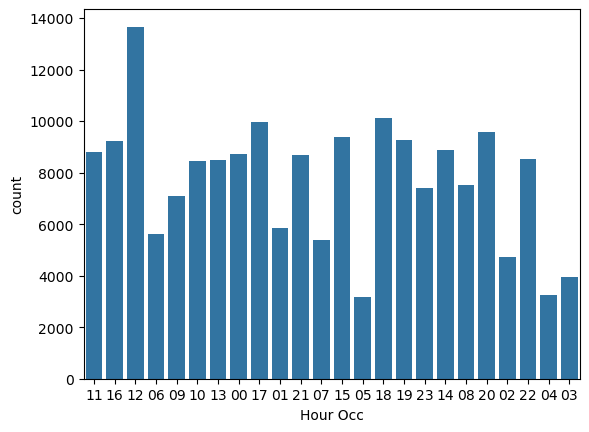

In [4]:
crimes['Hour Occ']=crimes['TIME OCC'].apply(lambda x:x[:2])

peak_crime_hour=int(crimes['Hour Occ'].value_counts().index[0])
sns.countplot(data=crimes, x="Hour Occ")
plt.show()

## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [6]:
crimes['TIME OCC']=crimes['TIME OCC'].astype(int)

crimes['Night Crime']=((crimes['TIME OCC']>2200)&(crimes['TIME OCC']<2359))|((crimes['TIME OCC']>0)&(crimes['TIME OCC']<359))
#crimes.groupby('AREA NAME')['Night Crime'].sum()
night_crime_per_area=crimes.groupby('AREA NAME',as_index=False)['Night Crime'].sum().sort_values('Night Crime')
peak_night_crime_location=night_crime_per_area.reset_index(drop=True).iloc[-1]['AREA NAME']
print(peak_night_crime_location)

Central


## Identify the number of crimes committed against victims of different age groups.

In [13]:
labels=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins=[0,17,25,34,44,54,64,crimes['Vict Age'].max()]
crimes['victim ages']=pd.cut(crimes['Vict Age'],labels=labels,bins=bins)
victim_ages=crimes.groupby('victim ages')['victim ages'].count()
print(victim_ages)

victim ages
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: victim ages, dtype: int64


C:\Users\noor_\AppData\Local\Temp\ipykernel_12072\35382476.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  victim_ages=crimes.groupby('victim ages')['victim ages'].count()
